# COGS 108 - Final Project - Crime Watch Effectiveness and Distribution

# Overview

The objective of our project was to analyze how surveillance plays a role in the types of crime committed in Los Angeles. We subdivided Los Angeles by zip code to help us obtain the number of crimes committed, the number of arrests made, the median home value, the number of streetlights, and the population of the specific area in order to gather the evidence we need in making our conclusion. Our analysis measured the relative impact of each component and its contributing factor to crime rates in LA. We were able to show a strong correlations between streetlight counts and crime rates.

# Names

- Alexander Schonken (A13331901)
- Jeffrey Chu        (A13613249)
- Jennifer Dich      (A14230996)
- Owen Clinton       (A13340650)

# Research Question

The question our group is trying to answer is: <b>What factors contribute to the types of crime committed in Los Angeles within a specific area throughout the day/night?</b> We also want to address what a data driven response would look like. One specific example we want to look into is whether street light coverage or a greater police presence contribute to lower overall crime rates in neighborhoods at night. We will use this data to consider whether moving police patrols to areas with less streetlight coverage would lead to a reduction in overall crime.

## Background and Prior Work

The datasets that we’re planning on using consist of streetlight data for the city of Los Angeles in combination with as much police data we can gather on locations where officers are called, the types of crimes committed, data on arrests made, and where officers stop people consistently. These datasets used together will help lead us to a more holistic view of the situation we are trying to analyze. Each of the datasets does not necessarily hold all of the data the others do in a homogenous way (i.e. some are missing years) but by increasing the amount of datasets we use and inferring connections based off of the data present, a clear picture will be painted and our call to action on what practices need to be put in place to increase the safety of Los Angeles will be backed up by valid data.

Before starting our exploratory data analysis of datasets we found on the subject, we don’t know a lot about the topic besides the inherent feeling of safety one gets when you’re in an area with street lights compared to a dark street. So our starting hypothesis is mainly based off of intuition and personal experience. The datasets we’ve found so far have a lot of information within them besides just location data, so we’ll have a very wide view of this narrow topic which we’ll be able to continually narrow our scope to reveal interesting answers and insightful conclusions.  

We weren’t able to find any other projects asking questions about the correlation between streetlights and police officer patrol locations. Our project seems to be fairly unique in the intersectionality of the data we’re using to reveal interesting insights into public safety. However, there have been projects created about streetlights and their affects on the number of crimes per year. An example of this is the report by Kinder Rice Institute for Urban Research that goes into how it was very difficult to recommend that cities increase streetlights to directly combat crime. Interestingly, on the other side of the argument is a research paper by CrimeLab New York in 2019 that found a significant drop in index crimes consisting of murder, aggravated assault, and other more "deadly" crimes. In addition to that finding, the paper also found that citizens living in the areas that received the lighting improvements were very pleased to have the additional infastructure in their neighborhoods. So the correlation between increasing street lighting and lowering crimes was very positively correlated in addition to the side effect of increasing the general happiness of citizens in the area.  

Since the research, that our group has been able to find, presents conclusions landing on both sides of the benefits of increasing street lighting to hep combat crime, our team's queston which more specifically focuses on police patrol positions relative to these well-lit areas should shed some new light on the subject and lead to increased insight on an apparently contested matter. Hopefully our project is able to contribute to the public good of Los Angeles (and by extension other cities) by discovering ways to increase the city's safety without increasing costs for taxpayers.

<b>References (include links):</b> 
<br>1) Kinder Rice Institute for Urban Researc - What Happens in the Shadows: Streetlights and How They Relate To Crime:
<br>https://kinder.rice.edu/sites/g/files/bxs1676/f/documents/Kinder%20Streetlights%20and%20Crime%20report.pdf
<br>2) CrimeLab New York - "Can Street Lighting Reduce Crime?":
<br>https://urbanlabs.uchicago.edu/projects/crime-lights-study

# Hypothesis


We hypothesize that areas with more street light coverage will have less overall crime than areas with less coverage. While some areas may have better surveillance, depending on location, we will try to control for the number of streetlights distributed within the areas patrolled to show the true underlying trend. If proven true it would lower the need for police to monitor those areas, allowing them the freedom to expand their range to cover areas that are less safe.

# Datasets

Dataset Name: Crime Data from 2010 to Present
- Link to the dataset: https://data.lacity.org/api/views/63jg-8b9z/rows.csv?accessType=DOWNLOAD
- Number of observations:2.09 million
- Description: LA city's dataset of crime starting in 2010. It includes all of the crime reports made within LA city during that time.

Dataset Name: Arrest Data from 2010 to Present
- Link to the dataset: https://data.lacity.org/api/views/yru6-6re4/rows.csv?accessType=DOWNLOAD
- Number of observations: 1.32 million
- Description: LA city's dataset of arrests starting in 2010. It includes booking data for all arrests made within LA city during that time.

Dataset Name: Zillow Home Value Index
- Link to the dataset: http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_Summary_AllHomes.csv
- Number of observations: 15744
- Description: Zillow's home value index dataset sorted by ZIP code. It includes all of the median house values in a certain ZIP code.  

Dataset Name: Median List Price per Square Foot
- Link to the dataset: http://files.zillowstatic.com/research/public/Zip/Zip_MedianListingPricePerSqft_AllHomes.csv
- Number of observations: 15744
- Description: Zillow's dataset including the median list price per square foot for houses in different ZIP codes.

Dataset Name: Streetlight Locations
- Link to the dataset: https://data.lacity.org/api/geospatial/9ei6-svt8?method=export&format=GeoJSON
- Number of observations: 216738
- Description: Point locations of all the streelights managed by LA city.

Dataset Name: Los Angeles City Zip Codes
- Link to the dataset: https://opendata.arcgis.com/datasets/875d540d71e64b8696cc368865c2b640_0.geojson
- Number of observations: 157
- Description: Geo data for ZIP codes within the city of LA.

Dataset Name: LA County ZIP Code
- Link to the dataset: https://opendata.arcgis.com/datasets/70748ba37ecc418891e052e800437681_5.geojson
- Number of observations: 316
- Description: Geo data for ZIP codes within LA county.

Dataset Name: 2010 Census Populations by Zip Code
- Link to the dataset: https://data.lacity.org/api/views/nxs9-385f/rows.csv?accessType=DOWNLOAD
- Number of observations: 319
- Description: Dataset including population within ZIP codes of LA county.

We will use the crime and arrest datasets joined with the zip code datasets to analyze the amount of crime in each ZIP code of LA. We will tie this data to the streetlight locations to see if the amount of streetlights in a given zip code affect the amount of crime. The population and home value datasets are there so we can add controls to the crime data.

# Setup

In [1]:
# Imports

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import folium.plugins as plugins
import shapely
import os
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import altair as alt
import geopandas as gpd

# Configure libraries

# Setup seaborn
sns.set()
sns.set_context('talk')

# Change options for displaying DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 50

# Round decimals in DataFrames
pd.set_option('precision', 2)

# Allow altair to display graphs in notebook
alt.renderers.enable('notebook')

#Setup altair to save graphs to external file. This breaks Vega but is needed if notebook gets too large.

#def json_dir(data, data_dir = 'altairdata'):
    #os.makedirs(data_dir, exist_ok = True)
    #return alt.pipe(data, alt.to_json(filename = data_dir + '/{prefix}-{hash}.{extension}'))
#alt.data_transformers.register('json_dir', json_dir)
#alt.data_transformers.enable('json_dir', data_dir = 'mydata')

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

File Paths for all the Datasets

In [2]:
LAArrestDataPath = r'ProjectData/LAArrestData.csv'
LACrimeDataPath = r'ProjectData/LACrimeData.csv'
LAStreetlightLocationPath = r'ProjectData/LAStreetlightLocations.geojson'
HomeValuePath = r'ProjectData/MedianPrice.csv'
HomePPSFPath = r'ProjectData/MedianPricePerSquareFoot.csv'
LAZipCodesPath = r'ProjectData/LAZipCodes.geojson'
LAZipCodePopulationPath = r'ProjectData/LAPopulationbyZipCode.csv'
LACityZipCodesPath = r'ProjectData/LACityZipCodes.geojson'

Initialize all datasets into geopandas and pandas dataframes

In [3]:
arrests = pd.read_csv(LAArrestDataPath)
crimes = pd.read_csv(LACrimeDataPath)
homeValue = pd.read_csv(HomeValuePath)
ppsf = pd.read_csv(HomePPSFPath)
populations = pd.read_csv(LAZipCodePopulationPath)
streetlights = gpd.read_file(LAStreetlightLocationPath)
zipCodes = gpd.read_file(LAZipCodesPath)
cityzipCodes = gpd.read_file(LACityZipCodesPath)

# Data Cleaning

- The data is fairly clean with no identifiable information and rounded location values. But since it is LAPD data they are not restricted to only LA city so in order to do an appropriate analysis we had to make a list of zip codes completely within LA.
- We had to change location and time data and then merge the data with different geoJson datasets in order to get all the data we needed.
- All the data was standardized so all the methods we used worked once nan values were dropped

In [4]:
# Drop columns and put crimes location into same format as arrests
arrests = arrests.drop(['Area ID','Area Name','Charge Group Code',
                        'Arrest Type Code','Charge','Address',
                        'Cross Street','Charge Description'], axis = 1)

# Putting crimes location data in the same form as arrests
crimes['Location'] = '(' + crimes['LAT'].map(str) + ', ' + crimes['LON'].map(str) + ')'

crimes = crimes.drop(['Date Rptd','AREA ','AREA NAME','Part 1-2','Crm Cd',
                      'Mocodes','Premis Cd','Premis Desc','Weapon Used Cd',
                      'Weapon Desc','Status','Crm Cd 1','Crm Cd 2','Crm Cd 3',
                      'Crm Cd 4','LOCATION','Cross Street','LON','LAT'], axis = 1)

arrests.columns = ['Report ID','Date','Time','Reporting District', 
                  'Arrest Age','Arrest Sex','Arrest Descent',
                   'Arrest Description','Location']
crimes.columns = ['Report ID','Date','Time','Reporting District',
                  'Crime Description','Victim Age','Victim Sex',
                  'Victim Descent','Status','Location']

# Drop Nan Data
arrests = arrests.dropna(subset = ['Time', 'Arrest Age', 'Arrest Sex', 'Arrest Descent', 'Arrest Description'])
crimes = crimes.dropna(subset = ['Time', 'Crime Description', 'Victim Age', 'Victim Sex', 'Victim Descent'])

Convert string location points to geometry for geopandas

In [5]:
def string_to_point(string):
    # Make a float tuple that will be converted into a POINT type
    string_tuple = tuple(map(float, string.replace('(','').replace(')','').split(',')))
    #convert to point using shapely
    point = shapely.geometry.Point(string_tuple[1],string_tuple[0])
    return point

In [6]:
arrestsgeometry = arrests['Location'].apply(string_to_point)
crimesgeometry = crimes['Location'].apply(string_to_point)

Add Zip Codes to crimes and arrest and streetlight dataframe

In [7]:
arrests_geo =  gpd.GeoDataFrame(arrests['Report ID'], geometry = arrestsgeometry)
crimes_geo = gpd.GeoDataFrame(crimes['Report ID'], geometry = crimesgeometry)

# Make sure that the geometry mapping matches with the other dataframe
arrests_geo.crs = zipCodes.crs
crimes_geo.crs = zipCodes.crs

# Join two dataframes by space to get the data for zip codes tied to each point based on if a point is in the zipcode area
arrestswithzip = gpd.sjoin(arrests_geo,zipCodes, how = 'inner', op = 'within')
crimeswithzip = gpd.sjoin(crimes_geo, zipCodes, how = 'inner', op = 'within')
streetlights = gpd.sjoin(streetlights, zipCodes, how = 'inner', op = 'within')

# Convert geodataframe with spatial data into a pandas dataframe
arrestsmergeframe = pd.DataFrame(arrestswithzip)
crimesmergeframe = pd.DataFrame(crimeswithzip)

# Join the two dataframes to get spatial data in original
arrests = pd.merge(arrests, arrestsmergeframe, on = 'Report ID')
crimes = pd.merge(crimes, crimesmergeframe, on = 'Report ID')

# Drop unused data
arrests = arrests.drop(['OBJECTID','index_right'], axis = 1)
crimes = crimes.drop(['OBJECTID','index_right'], axis = 1)

# Convert streetlight data into a pandas dataframe.
streetlightsdf = pd.DataFrame(streetlights)

Change time to actual time variables

In [8]:
def gethour(integer):
    # Time is stored in a 4 digit int so dividing by 100 gives the hour
    return int(integer/100)

In [9]:
arrests['Time'] = arrests['Time'].astype(int)
crimes['Hour'] = crimes['Time'].apply(gethour)
arrests['Hour'] = arrests['Time'].apply(gethour)

Make a list of unique zipcodes

In [10]:
# Make a list of unique zip codes for each dataframe
crimesarray = crimes['ZIPCODE'].unique()
arrestsarray = arrests['ZIPCODE'].unique()

# Or the two lists together to get their union
zipCodeArray = list(set(crimesarray) | set(arrestsarray))

# Make a new dataframe using the Data
zipCodedf = pd.DataFrame(zipCodeArray, columns = ['Zip'])

Only include housing, population data where stuff happens

In [11]:
# Rename Columns to things that make sense
homeValue['Zip'] = homeValue['RegionName'].astype(str)
populations['Zip'] = populations['Zip Code'].astype(str)
ppsf['Zip'] = ppsf['RegionName'].astype(str)

# Reduce the amount of unneeded data by only including data on zip codes where stuff happens
homeValue = pd.merge(zipCodedf, homeValue, how = 'left', on = 'Zip')
populations = pd.merge(zipCodedf, populations, how = 'left', on = 'Zip')
ppsf = pd.merge(zipCodedf, ppsf, how = 'left', on = 'Zip')

# If we don't have data on an area zero causes less issues than Nan
homeValue = homeValue.fillna(0)
populations = populations.fillna(0)
ppsf = ppsf.fillna(0)

Convert area in cityzipCodes dataframe to square km

In [12]:
# Convert polygon geometry to an equal length projection then get the area in km^2
cityzipCodes['Area'] = cityzipCodes['geometry'].to_crs({'init': 'epsg:3395'}).map(lambda p: p.area / 10**6)

Change one letter description strings in crimes and arrests dataframes to what they represent

In [13]:
def sexToString(string):
    # Convert 1 letter abbreviations to their meaning
    if string == 'F':
        return 'Female'
    elif string == 'M':
        return 'Male'
    else:
        return 'Unknown'
descentDict = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian',
    '-': 'Unknown'
}
def descentToString(string):
    # Convert 1 letter abbreviations to their meaning using a Dict
    return descentDict[string]

In [14]:
arrests['Arrest Sex'] = arrests['Arrest Sex'].apply(sexToString)
crimes['Victim Sex'] = crimes['Victim Sex'].apply(sexToString)
arrests['Arrest Descent'] = arrests['Arrest Descent'].apply(descentToString)
crimes['Victim Descent'] = crimes['Victim Descent'].apply(descentToString)

# Data Analysis & Results

<b>We will start off with a couple mapped visualizations of our data</b>

To do this we first tally up the total amount of crimes and arrests committed and made in each zip code

In [15]:
# This returns a Dict keyed by zipcode with counts of how many times they appeared
crimeCountDict = crimes['ZIPCODE'].value_counts()
arrestCountDict = arrests['ZIPCODE'].value_counts()
streetlightsDict = streetlightsdf['ZIPCODE'].value_counts()

# Pull the dicts into dataframes
crimeCounts = pd.DataFrame.from_dict(crimeCountDict).reset_index()
arrestCounts = pd.DataFrame.from_dict(arrestCountDict).reset_index()
streetlightsCounts = pd.DataFrame.from_dict(streetlightsDict).reset_index()

# Format the dataframes
crimeCounts.columns = ['Zip','Crime Count']
arrestCounts.columns = ['Zip', 'Arrest Count']
streetlightsCounts.columns = ['Zip', 'Streetlight Count']

# Join them together
counts = pd.merge(crimeCounts, arrestCounts, how = 'outer', on = 'Zip')
counts = pd.merge(counts, streetlightsCounts, how = 'left', on = 'Zip')

# Again fill any null data with 0
counts = counts.fillna(0)

# Add a total column
counts['Total'] = counts['Crime Count'] + counts['Arrest Count']

We then map out each zip code and add pop ups to each one to display data for each zip code

In [16]:
# Initialize the map with a restriction on zoom
choroplethPopup = folium.Map([34.055862, -118.326904], max_zoom = 12)

# Make a container for all the geo blocks
zipcodeLayer = folium.FeatureGroup(name = 'Zip Codes')
# We'll want the overlays to be transparent so they don't cover up the choropleth
transparent = {'fillColor': '#00000000', 'color': '#00000000'}

# Create the choropleth based on the total counts within each zip
folium.Choropleth(
    geo_data = cityzipCodes,
    name = 'Choropleth',
    data = counts,
    columns = ['Zip', 'Total'],
    key_on = 'feature.properties.ZIPCODE',
    fill_color = 'BuPu',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Total Crimes').add_to(choroplethPopup)

# For every zip code define its geoJson as a separate area attach a popup then put it in the container
for i in zipCodeArray:
    datarow = counts.where(counts['Zip'] == i).dropna().iloc[0]
    gs = folium.GeoJson(zipCodes.loc[zipCodes['ZIPCODE'] == i], style_function = lambda x: transparent)
    zipCodelabel = i
    crimeslabel = datarow['Crime Count']
    arrestslabel = datarow['Arrest Count']
    totallabel = datarow['Total']
    populationlabel = populations.where(populations['Zip'] == i).dropna().iloc[0]['Total Population']
    homeValuelabel = int(homeValue.where(homeValue['Zip'] == i).dropna().iloc[0]['Zhvi'])
    streetlightslabel = datarow['Streetlight Count']
    popuphtml = """
            <html>
                <body>
                    <h1>%s</h1>
                    <p>Number of Crimes Commited: %s</p>
                    <p>Number of Arrests Made: %s</p>
                    <p>Total: %s</p>
                    <p>Median Home Price: %s</p>
                    <p>Population: %s</p>
                    <p>Number of Streetlights: %s</p>
                </body>
            </html>"""%(zipCodelabel, str(crimeslabel), str(arrestslabel), str(totallabel), 
                        str(homeValuelabel), str(populationlabel), str(streetlightslabel))
    folium.Popup(popuphtml,max_width = 250, sticky = True).add_to(gs)
    gs.add_to(zipcodeLayer)
    
# Add the geoJson container then add the layer controller
choroplethPopup.add_child(zipcodeLayer)
folium.LayerControl().add_to(choroplethPopup)

In [17]:
# Since these graphs are quite large they bog down Jupyter so we save and look at them externally
choroplethPopup.save('LabeledChoropleth.html')

Next we move on to a dynamic heatmap of crime activity

In [18]:
# We only need a small amount of data for the heatmap
crimesHeatMap = crimes[['Report ID', 'Location', 'Hour']]
arrestsHeatMap = arrests[['Report ID', 'Location', 'Hour']]

# Merge the data together to get the totals
heatMap  = pd.merge(crimesHeatMap, arrestsHeatMap, how = 'outer', on = ['Report ID', 'Location', 'Hour'])

# Make 24:00 and 00:00 match up
heatMap['Hour'] = heatMap['Hour'].replace(24.0, 0.0)

# Split location string into Lat and Long components
heatMap['Lat'], heatMap['Lon'] = heatMap['Location'].str.split(',').str

# Convert them to floats
heatMap['Lat'] = heatMap['Lat'].str.replace('(','').astype(float)
heatMap['Lon'] = heatMap['Lon'].str.replace(')','').astype(float)

# Add a constant for the heatmap's weighting
heatMap['count'] = 1

# Make an array of labels for the time slider
hoursofday = ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', 
              '06:00', '07:00', '08:00', '09:00', '10:00', '11:00',
              '12:00', '13:00', '14:00', '15:00', '16:00', '17:00',
              '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']

In [19]:
# This creates a list of lists with the outer list being hours and the inner list being every point during that hour
hourList = []
for i in heatMap.Hour.sort_values().unique():
    hourList.append(heatMap.loc[heatMap.Hour == i, ['Lat', 'Lon', 'count']].groupby(['Lat', 'Lon']).sum().reset_index().values.tolist())

In [20]:
# Initialize the heat map in the same was as above
timeHeatMap = folium.Map([34.055862, -118.326904], max_zoom = 12)

# Use the heatmap plugin to make the heatmap
plugins.HeatMapWithTime(
    hourList,
    index = hoursofday,
    radius = 5,
    gradient = {0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'},
    min_opacity = 0.5,
    max_opacity = 0.8,
    use_local_extrema = True
    ).add_to(timeHeatMap)

In [21]:
# Save map externally
timeHeatMap.save('HeatMap.html')

Now we make charts of our data and put them on the map

In [22]:
# These charts will show data about victims and those arrested so we only pull that data
crimesChartFrame = crimes[['Victim Age', 'Victim Sex', 'Victim Descent', 'Crime Description', 'ZIPCODE']]
arrestsChartFrame = arrests[['Arrest Age', 'Arrest Sex', 'Arrest Descent', 'Arrest Description', 'ZIPCODE']]

In [23]:
# Since we are making multiple complex charts and attaching them to a map we need to pare down the search
# If we were to include every zip the file would be over a gig and chrome wouldn't be able to open it
# I do not know this from experience
# Here we're graphing the highest crime zip code, Beverly hills, China town, Korea town, Venice beach and two others.
interestingzipCodes = [90003, 90028, 90210, 90291, 90042, 90005, 90012]

In [24]:
ageSexDict = {}

# This creates a Dict keyed by zip code of 2 x 2 chart with an age histogram colored using the sex
# It also includes a count of each sex present
for i in interestingzipCodes:
    crime_frame = crimesChartFrame.where(crimesChartFrame['ZIPCODE'] == str(i)).dropna()
    arrest_frame = arrestsChartFrame.where(arrestsChartFrame['ZIPCODE'] == str(i)).dropna()
    population_frame = populations.where(populations['Zip'] == str(i)).dropna()
    
    rule = alt.Chart(population_frame).mark_rule(color = 'red').encode(
        x = 'Median Age:Q'
    ).properties(width = 300)

    crimesAgeSexChart = alt.Chart(crime_frame).mark_bar().encode(
        x = 'Victim Age:Q',
        y = 'count(Victim Age):Q', color = 'Victim Sex'
    ).transform_filter(
        alt.FieldGTPredicate(field = 'Victim Age', gt = 0)
    ).properties(height = 200,width = 300)
    
    crimesSexes = alt.Chart(crime_frame).mark_bar().encode(
        x = 'count()',
        y = 'Victim Sex:O',
        color = 'Victim Sex'
    ).properties(height = 200, width = 75)
    
    arrestsAgeSexChart = alt.Chart(arrest_frame).mark_bar().encode(
        x = 'Arrest Age:Q',
        y = 'count(Arrest Age):Q', color = 'Arrest Sex'
    ).transform_filter(
        alt.FieldGTPredicate(field = 'Arrest Age', gt = 0)
    ).properties(height = 200, width = 300)
    
    arrestsSexes = alt.Chart(arrest_frame).mark_bar().encode(
        x = 'count()',
        y = 'Arrest Sex:O',
        color = 'Arrest Sex'
    ).properties(height = 200, width = 75)
    
    x = alt.layer(crimesAgeSexChart, rule)|crimesSexes
    y = alt.layer(arrestsAgeSexChart, rule)|arrestsSexes
    ageSexDict[i] = x&y

In [25]:
ageDescentDict = {}

# This creates a Dict keyed by zip code of 2 x 2 charts with an age histogram colored using the Descent
# It also includes a count of each descent present
for i in interestingzipCodes:
    crime_frame = crimesChartFrame.where(crimesChartFrame['ZIPCODE'] == str(i)).dropna()
    arrest_frame = arrestsChartFrame.where(arrestsChartFrame['ZIPCODE'] == str(i)).dropna()
    population_frame = populations.where(populations['Zip'] == str(i)).dropna()
    
    rule = alt.Chart(population_frame).mark_rule(color = 'red').encode(
        x = 'Median Age:Q'
    ).properties(width = 300)
    
    crimesAgeDescentChart = alt.Chart(crime_frame).mark_bar().encode(
        x = 'Victim Age:Q',
        y = 'count(Victim Age):Q', color = 'Victim Descent'
    ).transform_filter(
        alt.FieldGTPredicate(field = 'Victim Age', gt = 0)
    ).properties(height = 200, width = 300)
    
    crimesDescents = alt.Chart(crime_frame).mark_bar().encode(
        x = 'count()',
        y = 'Victim Descent:O',
        color = 'Victim Descent'
    ).properties(height = 200, width = 75)
    
    arrestsAgeDescentChart = alt.Chart(arrest_frame).mark_bar().encode(
        x = 'Arrest Age:Q',
        y = 'count(Arrest Age):Q', color = 'Arrest Descent'
    ).transform_filter(
        alt.FieldGTPredicate(field = 'Arrest Age', gt = 0)
    ).properties(height = 200, width = 300)
    
    arrestsDescents = alt.Chart(arrest_frame).mark_bar().encode(
        x = 'count()',
        y = 'Arrest Descent:O',
        color = 'Arrest Descent'
    ).properties(height = 200, width = 75)
    
    x = alt.layer(crimesAgeDescentChart, rule)|crimesDescents
    y = alt.layer(arrestsAgeDescentChart, rule)|arrestsDescents
    ageDescentDict[i] = x&y

In [26]:
descriptionDict = {}

# Same as above but showing the top crimes and arrest descriptions for each zip
for i in interestingzipCodes:
    crime_frame = crimesChartFrame.where(crimesChartFrame['ZIPCODE'] == str(i)).dropna()
    arrest_frame = arrestsChartFrame.where(arrestsChartFrame['ZIPCODE'] == str(i)).dropna()
    
    crimeDescChart = alt.Chart(crime_frame).transform_aggregate(
        count = 'count()',
        groupby = ['Crime Description']
    ).transform_window(
        rank = 'rank(count)',
        sort = [alt.SortField('count', order = 'descending')]
    ).mark_bar().encode(
        x = alt.X('Crime Description:O',
                 sort = alt.EncodingSortField(field = 'count',
                                             op = 'sum',
                                             order = 'descending')),
        y = alt.Y('count:Q')
    ).transform_filter(
        alt.datum.rank < 5
    ).properties(height = 200, width = 200)
    
    arrestDescChart = alt.Chart(arrest_frame).transform_aggregate(
        count = 'count()',
        groupby = ['Arrest Description']
    ).transform_window(
        rank = 'rank(count)',
        sort = [alt.SortField('count', order = 'descending')]
    ).mark_bar().encode(
        x = alt.X('Arrest Description:O',
                 sort = alt.EncodingSortField(field = 'count',
                                             op = 'sum',
                                             order = 'descending')),
        y = alt.Y('count:Q')
    ).transform_filter(
        alt.datum.rank < 5
    ).properties(height = 200, width = 200)
    
    descriptionDict[i] = crimeDescChart | arrestDescChart

In [27]:
# Very similar process to the labeled choropleth above but using vegalite and with more containers
choroplethGraph = folium.Map([34.055862, -118.326904], max_zoom = 12)
ageSexLayer = folium.FeatureGroup(name = 'Age vs Sex', show = False)
ageDescentLayer = folium.FeatureGroup(name = 'Age vs Descent', show = False)
descriptionLayer = folium.FeatureGroup(name = 'Descriptions')
transparent = {'fillColor': '#00000000', 'color': '#00000000'}
folium.Choropleth(
    geo_data = cityzipCodes,
    name = 'Choropleth',
    data = counts,
    columns = ['Zip', 'Total'],
    key_on = 'feature.properties.ZIPCODE',
    fill_color = 'BuPu',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Total Crimes').add_to(choroplethGraph)

for i in interestingzipCodes:
    gsAS = folium.GeoJson(cityzipCodes.loc[cityzipCodes['ZIP'] == i])
    gsAD = folium.GeoJson(cityzipCodes.loc[cityzipCodes['ZIP'] == i])
    gsD = folium.GeoJson(cityzipCodes.loc[cityzipCodes['ZIP'] == i])
    zipCodelabel = str(i)
    folium.Popup(max_width = 750, sticky = True).add_child(
        folium.VegaLite(ageSexDict[i], width = 750, height = 400)).add_to(gsAS)
    folium.Popup(max_width = 750, sticky = True).add_child(
        folium.VegaLite(ageDescentDict[i], width = 750, height = 400)).add_to(gsAD)
    folium.Popup(max_width = 750, sticky = True).add_child(
        folium.VegaLite(descriptionDict[i], width = 700, height = 200)).add_to(gsD)
    ageSexLayer.add_child(gsAS)
    ageDescentLayer.add_child(gsAD)
    descriptionLayer.add_child(gsD)
    
    
choroplethGraph.add_child(ageSexLayer)
choroplethGraph.add_child(ageDescentLayer)
choroplethGraph.add_child(descriptionLayer)
folium.LayerControl().add_to(choroplethGraph)

In [28]:
# This is the main reason that we save externally
choroplethGraph.save('GraphsChoropleth.html')

In the interest of saving space and actually being able to turn in the notebook I will only display .png screenshots of each graph. If you run the code they are produced and I will include the heat map and the labeled choropleth in git.

In [29]:
from IPython.display import Image

First up we have the heat map at the point where crime in the city is maximized at 4:00am.

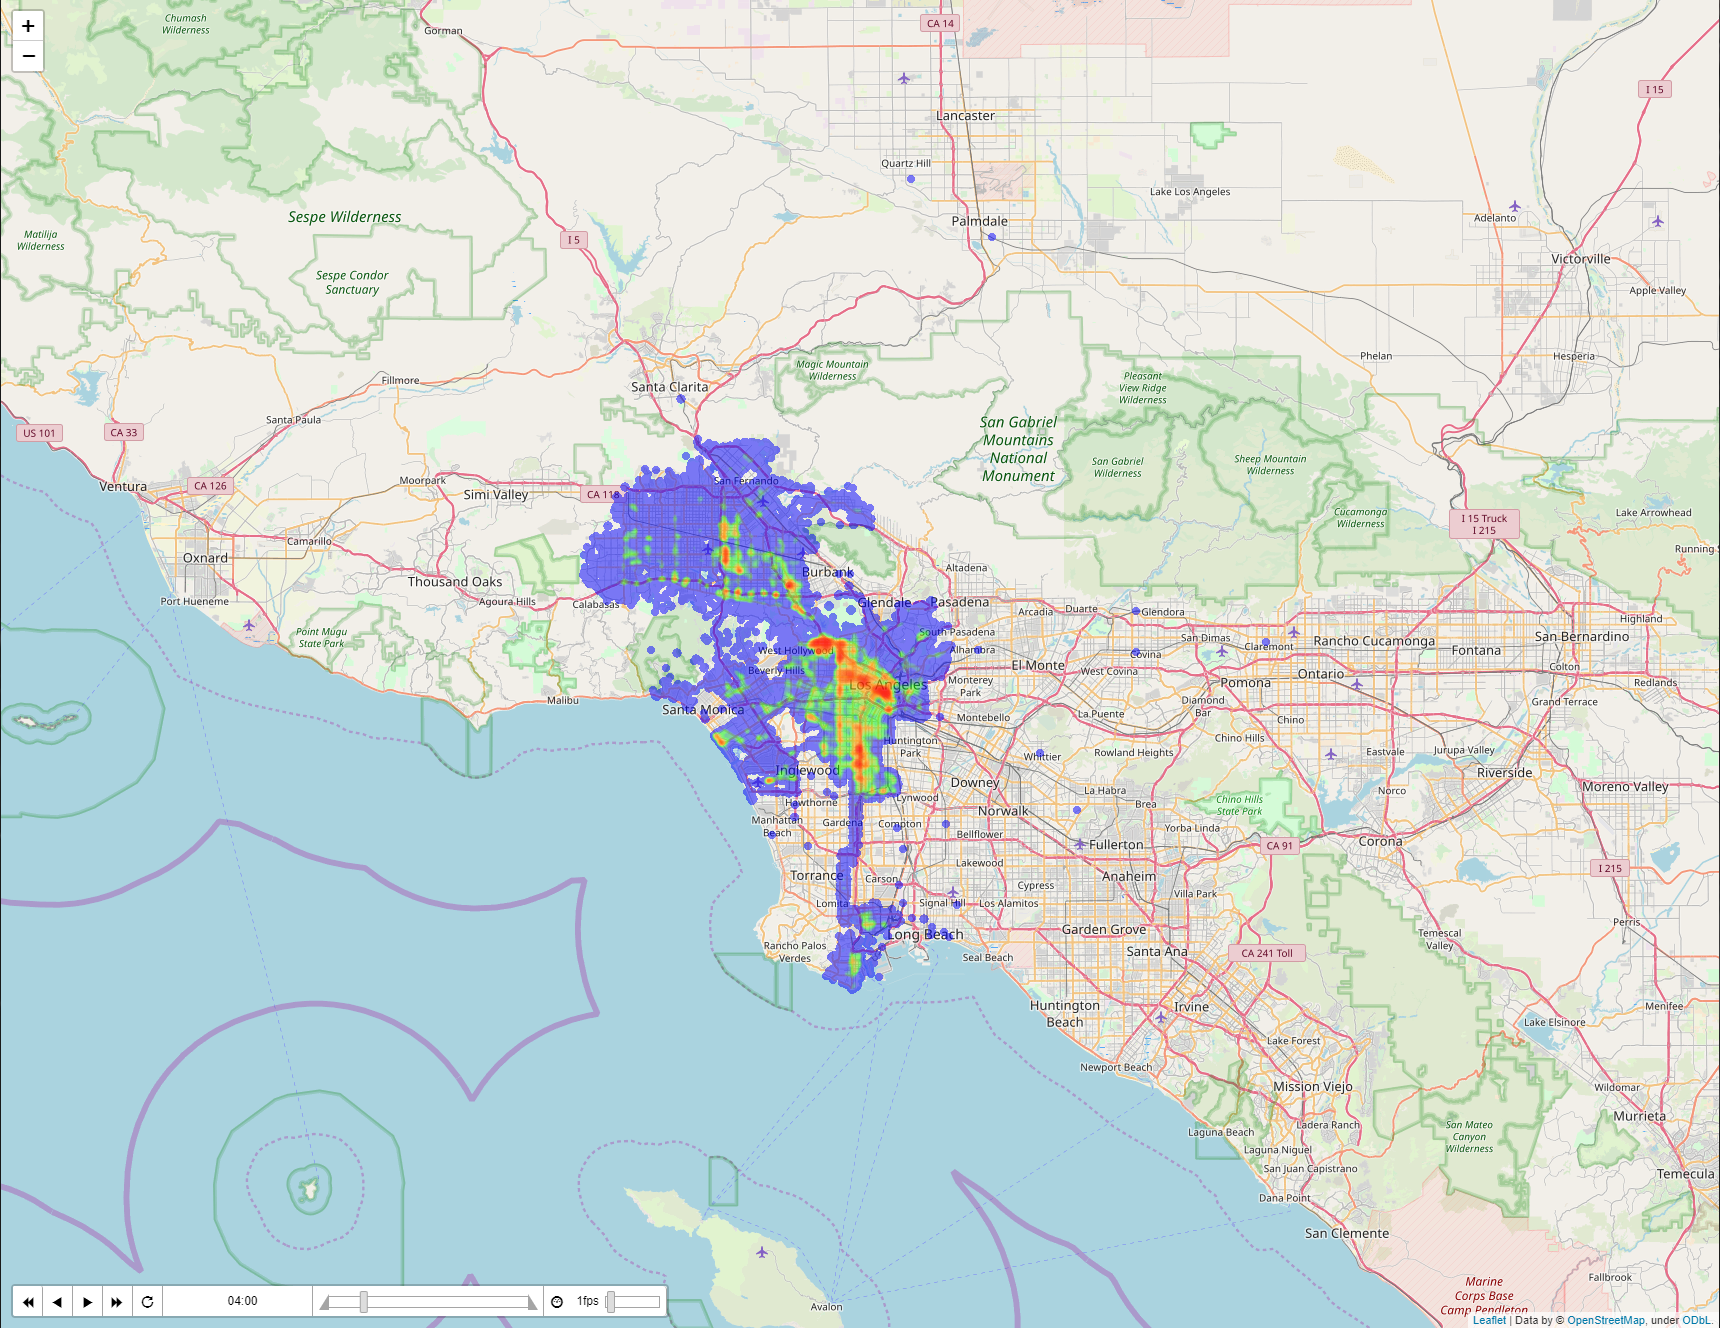

In [30]:
Image(filename='HeatMap.png') 

Next is the labeled choropleth showing some of the labels for the zip codes that we'll graph

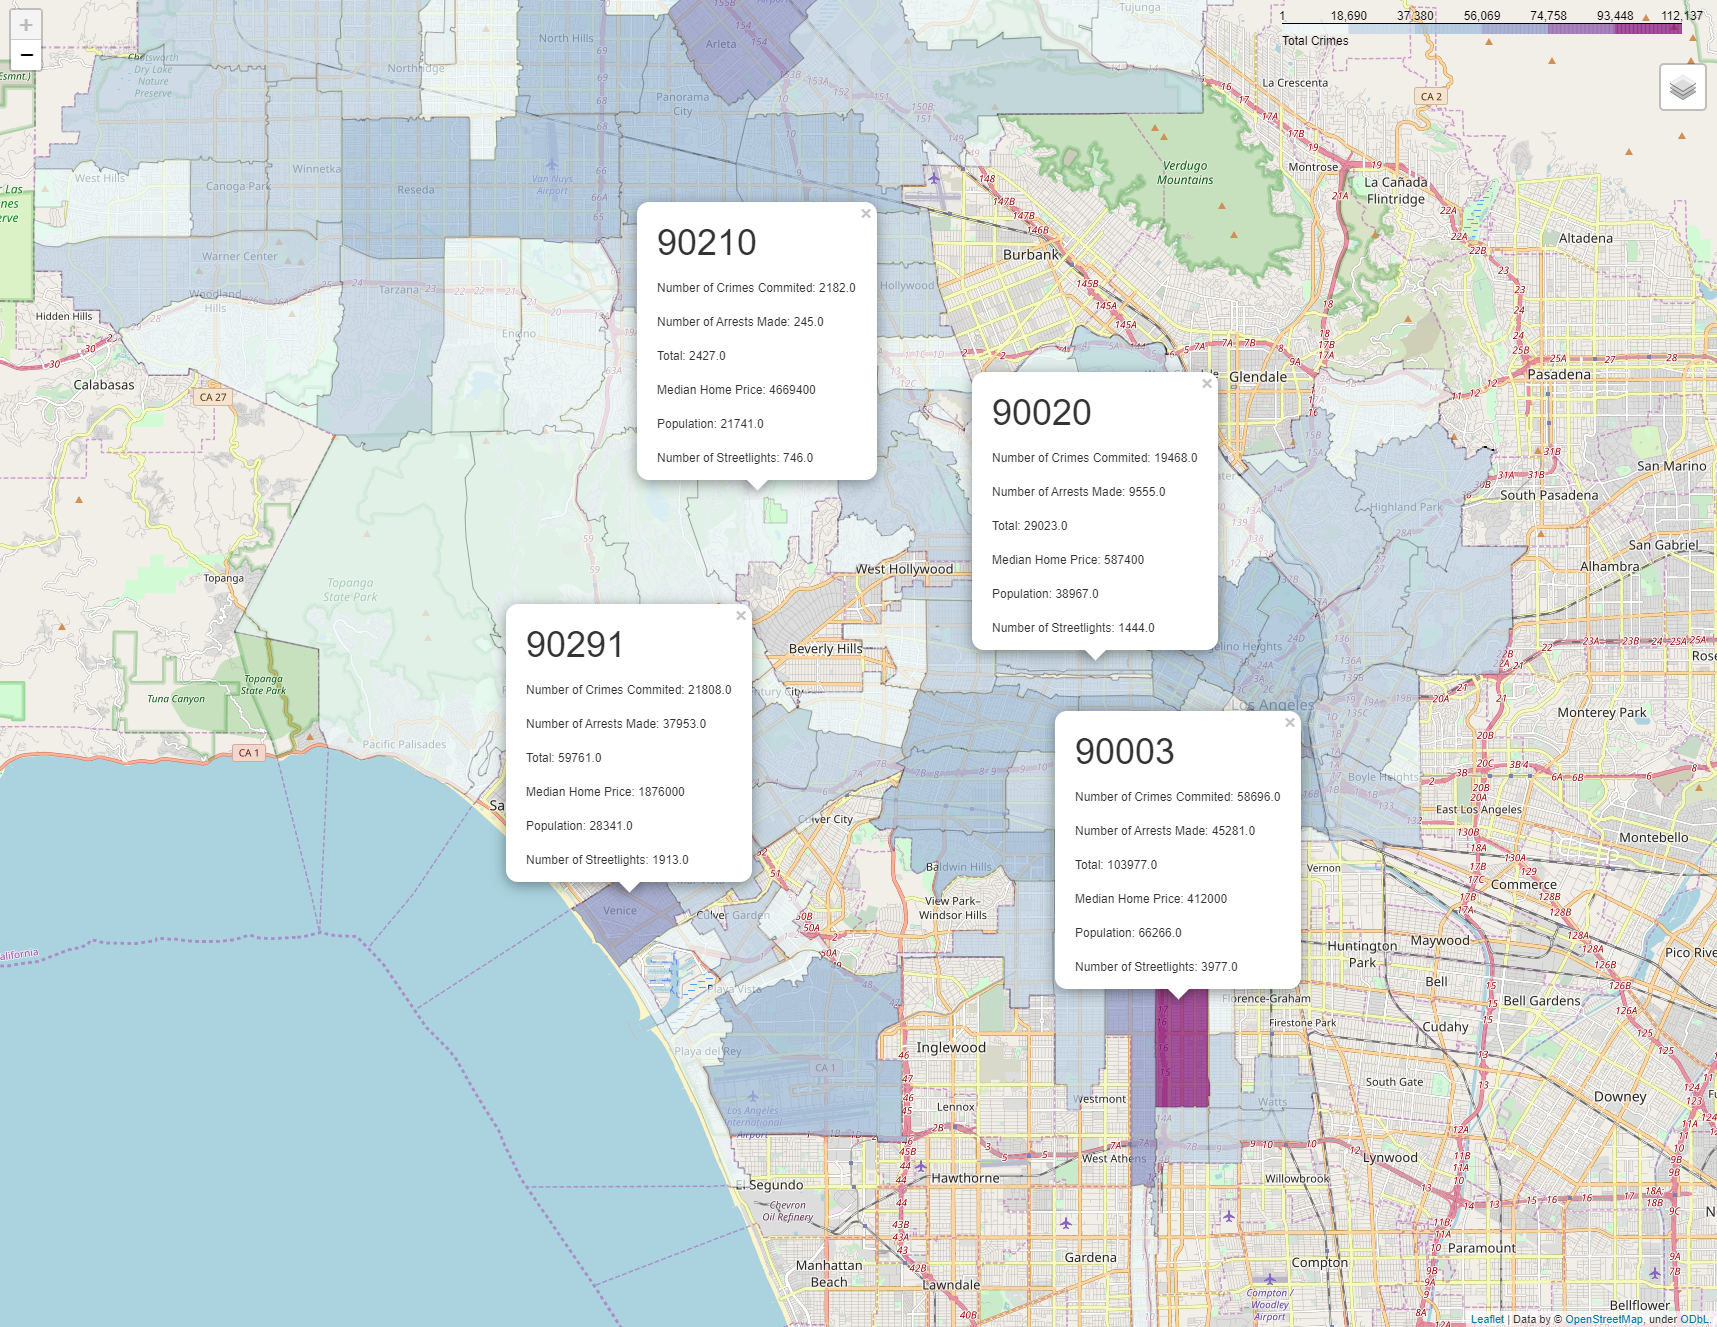

In [31]:
Image(filename='LabeledChoropleth.png') 

And finally the graphs choropleth with the description graphs on 90210 and 90042. The Age vs Sex graph on 90003. And the Age vs Descent graph on 90291.

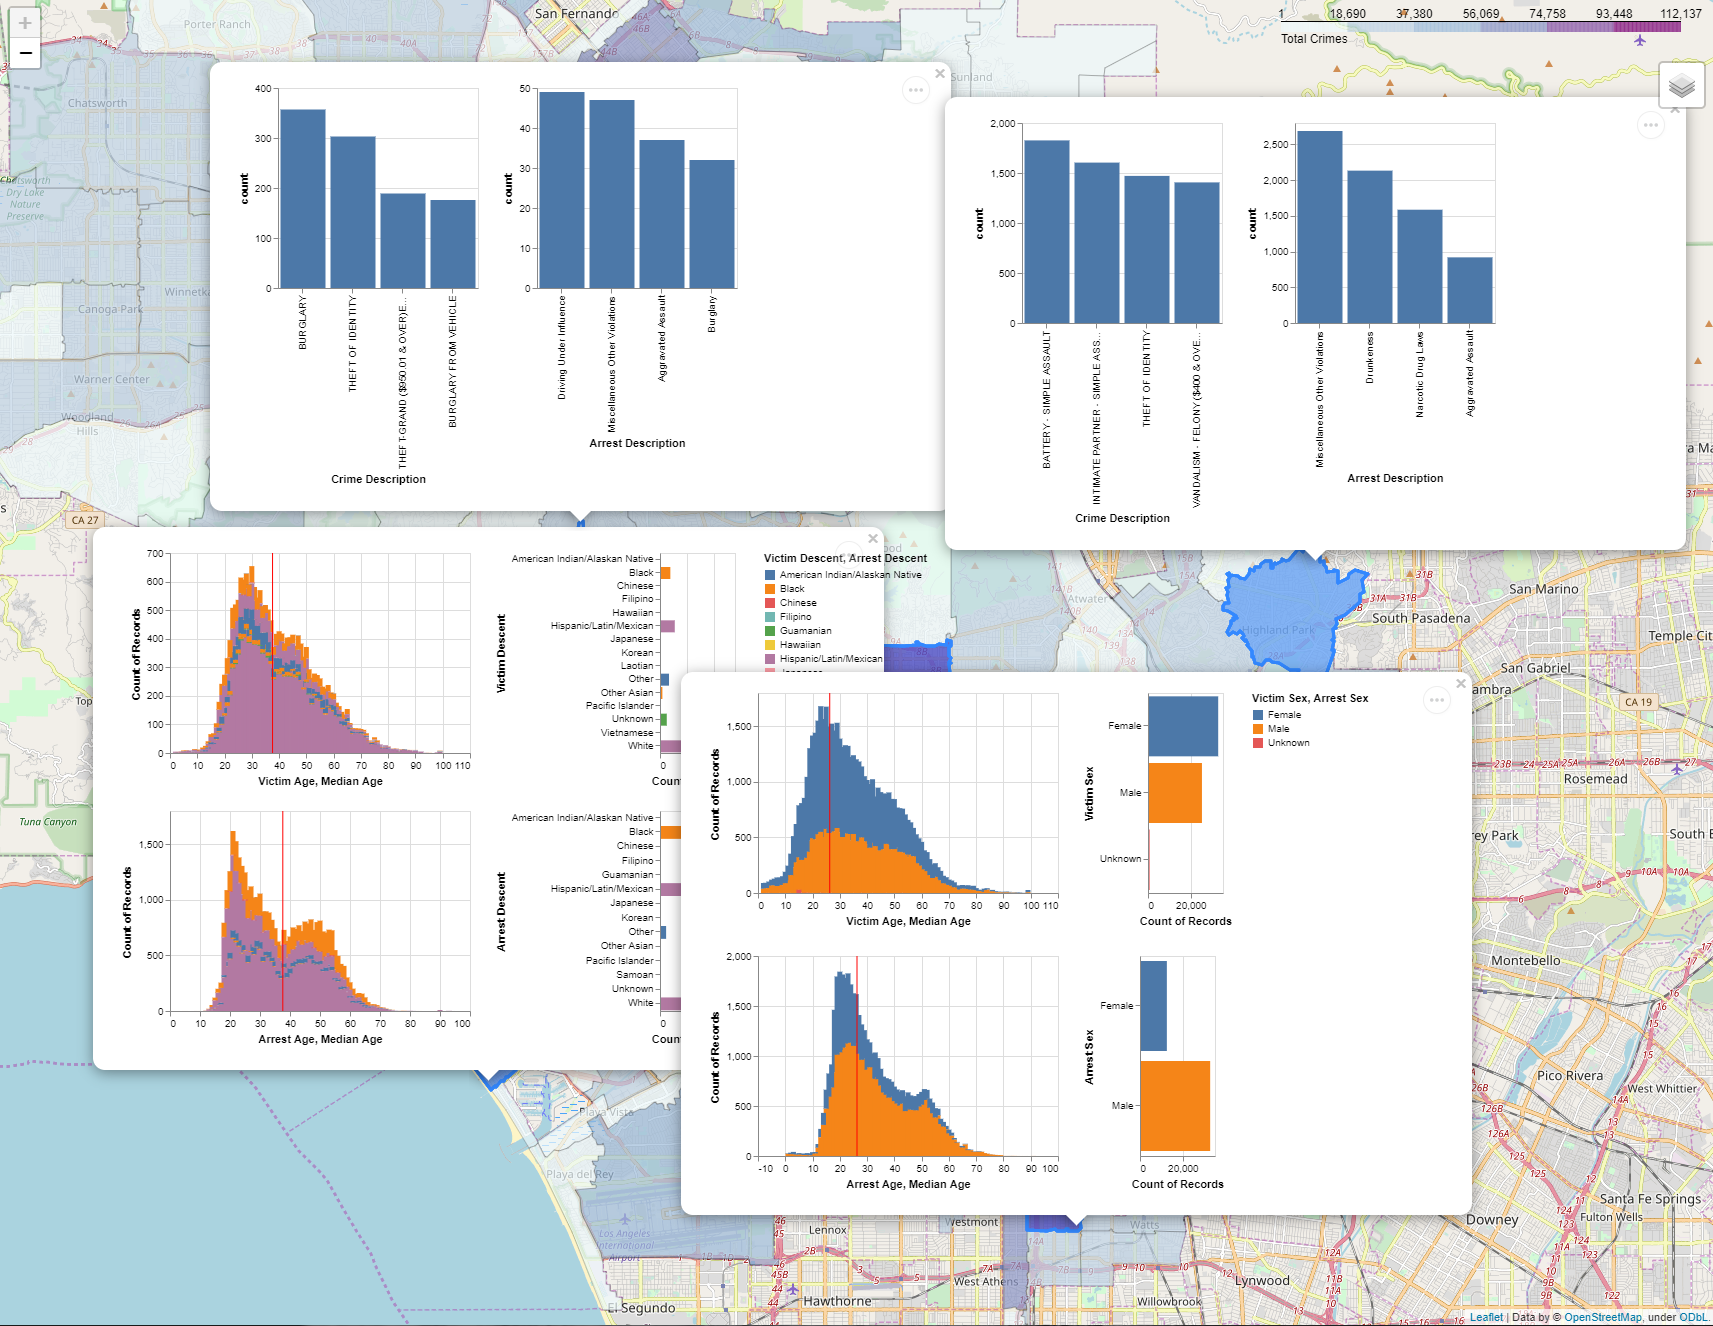

In [32]:
Image(filename='GraphsChoropleth.png') 

Now that we're done with the fun stuff we can actually analyze the data and address our original hypothesis.

We'll first clean our data a little and organize it into a new dataframe. But first a brief introduction

In [33]:
# We only want to include crimes that happen at night since we are analyzing the streetlights
crimes = crimes.where((crimes['Hour'] >= 16) | (crimes['Hour'] <= 8)).dropna()
arrests = arrests.where((arrests['Hour'] >= 16) | (arrests['Hour'] <= 8)).dropna()

We'll just redo the count procedure from above to get the new counts for incidents at night

In [34]:
# This returns a Dict keyed by zipcode with counts of how many times they appeared
nightcrimeCountDict = crimes['ZIPCODE'].value_counts()
nightarrestCountDict = arrests['ZIPCODE'].value_counts()

# Pull the dicts into dataframes
nightcrimeCounts = pd.DataFrame.from_dict(nightcrimeCountDict).reset_index()
nightarrestCounts = pd.DataFrame.from_dict(nightarrestCountDict).reset_index()

# Format the dataframes
nightcrimeCounts.columns = ['Zip','Crime Count']
nightarrestCounts.columns = ['Zip', 'Arrest Count']

# Join them together
nightcounts = pd.merge(nightcrimeCounts, nightarrestCounts, how = 'outer', on = 'Zip')
nightcounts = pd.merge(nightcounts, streetlightsCounts, how = 'left', on = 'Zip')

# Again fill any null data with 0
nightcounts = nightcounts.fillna(0)

# Add a total column
nightcounts['Total'] = nightcounts['Crime Count'] + nightcounts['Arrest Count']

Since we are looking at zip codes within LA city and not in LA county we must only consider zip codes completely within LA city limits.

In [35]:
zipCodesinLACity = ['90003','90004','90005','90006','90007','90010','90011','90012',
                    '90013','90014','90015','90016','90017','90018','90019','90020',
                    '90021','90024','90026','90027','90028','90029','90031','90032',
                    '90033','90034','90035','90036','90037','90038','90039','90041',
                    '90042','90045','90056','90057','90062','90064','90065','90067',
                    '90068','90071','90077','90089','90094','90075','90210','90211',
                    '90212','90272','90731','90732','90744','91040','91303','91306',
                    '91307','90316','91324','91235','91330','91331','91335','91343',
                    '91344','91345','91352','91356','91356','91401','91402','91403',
                    '90405','91406','91411','91423','91436','91601','91602','91604',
                    '91605','91606','91607']

In [36]:
zipCodesinLACitydf = pd.DataFrame(zipCodesinLACity, columns = ['Zip'])

In [37]:
analysisDF = pd.DataFrame(cityzipCodes[['ZIP', 'Area']])
analysisDF.columns = ['Zip', 'Area']
analysisDF['Zip'] = analysisDF['Zip'].astype(int)
analysisDF['Zip'] = analysisDF['Zip'].astype(str)

In [38]:
analysisDF = pd.merge(zipCodesinLACitydf, analysisDF, how = 'left', on = 'Zip')

In [39]:
analysisDF = pd.merge(analysisDF, nightcounts , how = 'left', on = 'Zip')
analysisDF = pd.merge(analysisDF, populations[['Zip', 'Total Population', 'Median Age']], how = 'left', on = 'Zip')
analysisDF = pd.merge(analysisDF, homeValue[['Zip','Zhvi']], how = 'left', on = 'Zip')
analysisDF.columns = ['Zip', 'Area', 'CrimeCount', 'ArrestCount', 'StreetlightCount', 'Total', 'TotalPopulation', 'MedianAge', 'MedianHomePrice']

In [40]:
crimechart = alt.Chart(analysisDF).mark_circle(size = 60).encode(
    x = 'StreetlightCount:Q',
    y = 'CrimeCount:Q'
)
arrestchart = alt.Chart(analysisDF).mark_circle(size = 60, color = 'red').encode(
    x = 'StreetlightCount:Q',
    y = 'ArrestCount:Q'
)

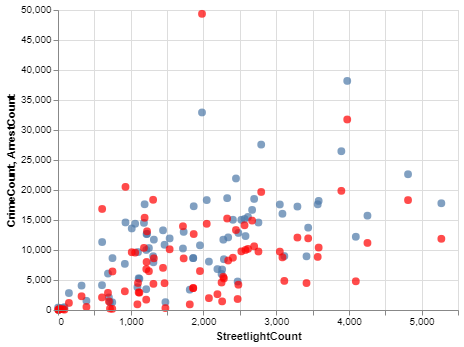

In [41]:
crimechart + arrestchart

It seems that the streetlight count is positively correlated with the crime count in each zip code. With more streetlights meaning more crime. Lets do a linear regression to see if this data is significant.

In [42]:
outcome, predictors = patsy.dmatrices('Total ~ StreetlightCount', analysisDF)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

In [43]:
analysisDF = analysisDF.where(analysisDF['Area'] >= 2).dropna()

In [44]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     33.44
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           1.45e-07
Time:                        23:39:56   Log-Likelihood:                -865.75
No. Observations:                  80   AIC:                             1735.
Df Residuals:                      78   BIC:                             1740.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6700.6070   2618.688  

At first glance this seems promising but it shows the exact opposite of what we might expect. The p-value is 0 which means that we can reject the null hypothesis. We could just stop right here and say that increasing streetlights leads to an increase in crime. Let's now control our values in order to see whats really happening.

To address any outliers above we'll use crime rate by dividing the total crime by population, and we'll control streetlight counts by dividing them by the area of the zip code. We'll also plot the scatter plots with their linear line of best fit.

In [45]:
analysisDF['ControlTotal'] = analysisDF['Total'] / analysisDF['TotalPopulation']

In [46]:
analysisDF['PopulationperArea'] = analysisDF['TotalPopulation'] / analysisDF['Area']

In [47]:
analysisDF['ControlStreetlightCountArea'] = analysisDF['StreetlightCount'] / analysisDF['Area']

In [49]:
outcome, predictors = patsy.dmatrices('ControlTotal ~ TotalPopulation', analysisDF)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
analysisDF['PopulationFunction'] = analysisDF['TotalPopulation']*res.params[1] + res.params[0]
populationline = alt.Chart(analysisDF).mark_line(color = 'black').encode(
x = 'TotalPopulation',
y = 'PopulationFunction')

In [50]:
outcome, predictors = patsy.dmatrices('ControlTotal ~ MedianHomePrice', analysisDF)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
analysisDF['MedianFunction'] = analysisDF['MedianHomePrice']*res.params[1] + res.params[0]
medianline = alt.Chart(analysisDF).mark_line(color = 'black').encode(
x = 'MedianHomePrice',
y = 'MedianFunction')

In [51]:
outcome, predictors = patsy.dmatrices('ControlTotal ~ ControlStreetlightCountArea', analysisDF)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
analysisDF['StreetlightFunction'] = analysisDF['ControlStreetlightCountArea']*res.params[1] + res.params[0]
streetline = alt.Chart(analysisDF).mark_line(color = 'black').encode(
x = 'ControlStreetlightCountArea',
y = 'StreetlightFunction')

In [52]:
outcome, predictors = patsy.dmatrices('ControlTotal ~ PopulationperArea', analysisDF)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
analysisDF['PopulationAreaFunction'] = analysisDF['PopulationperArea']*res.params[1] + res.params[0]
populationarealine = alt.Chart(analysisDF).mark_line(color = 'black').encode(
x = 'PopulationperArea',
y = 'PopulationAreaFunction')

In [53]:
Streetlightchart = alt.Chart(analysisDF).mark_circle(size = 60).encode(
    x = 'ControlStreetlightCountArea:Q',
    y = 'ControlTotal:Q'
)

Populationchart = alt.Chart(analysisDF).mark_circle(size = 60).encode(
    x = 'TotalPopulation:Q',
    y = 'ControlTotal:Q'
)

MedianPricechart = alt.Chart(analysisDF).mark_circle(size = 60).encode(
    x = 'MedianHomePrice:Q',
    y = 'ControlTotal:Q'
)

PopulationAreachart = alt.Chart(analysisDF).mark_circle(size = 60).encode(
    x = 'PopulationperArea:Q',
    y = 'ControlTotal:Q'
)

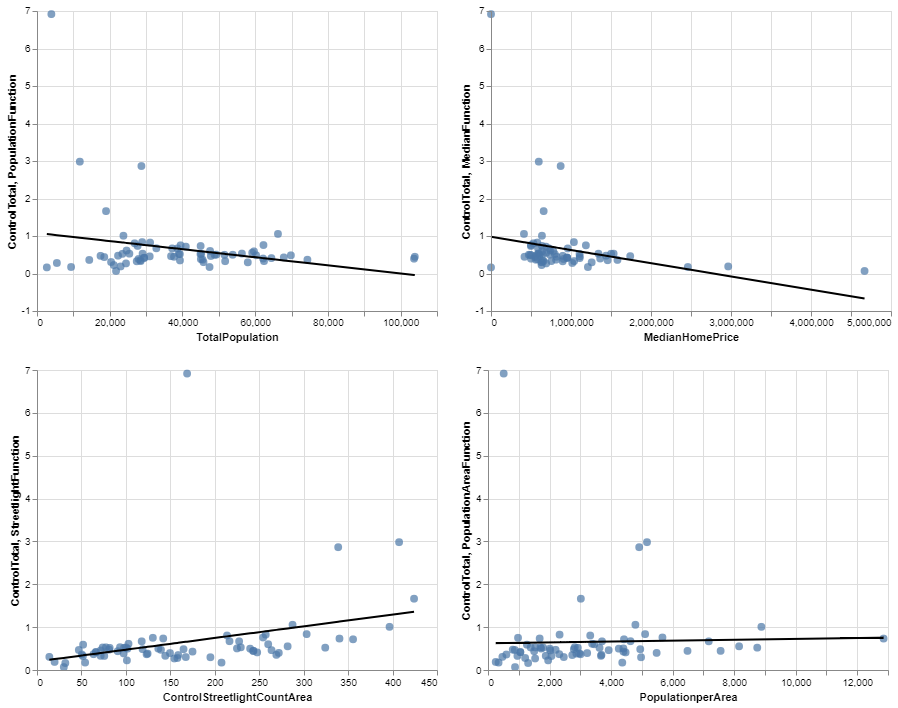

In [54]:
((Populationchart + populationline) | (MedianPricechart + medianline)) & (
    (Streetlightchart + streetline)|(PopulationAreachart + populationarealine))

There seem to be less outliers but one stands out with a median home price of 0. Based on the other graphs this zip code has a low population but is fairly well lit so we can assume that it is likely in the city where there are no homes. Even with the controlled values this still shows a positive correlation with streetlights and crime rate. We'll run another regression just to be sure.

In [55]:
outcome, predictors = patsy.dmatrices('ControlTotal ~ MedianHomePrice + ControlStreetlightCountArea + TotalPopulation + PopulationperArea', analysisDF)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

In [56]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           ControlTotal   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     6.641
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           0.000149
Time:                        23:40:15   Log-Likelihood:                -79.698
No. Observations:                  71   AIC:                             169.4
Df Residuals:                      66   BIC:                             180.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

This is again somewhat expected just not what we wanted. The p-value for the streetlight count suggests it's the best model to go by but it is still the opposite of our hypothesis. Since we're controlling with total population areas within city center are going to have an abnormally high crime rate due to the fact that there are fewer permanent residents with a large amount of crime in the area. We can remove these outliers by removing any zip code without a median home price. Let's see how that changes things.

In [57]:
analysisDF = analysisDF.where(analysisDF['MedianHomePrice'] != 0).dropna()

In [61]:
outcome, predictors = patsy.dmatrices('ControlTotal ~ TotalPopulation', analysisDF)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
analysisDF['PopulationFunction'] = analysisDF['TotalPopulation']*res.params[1] + res.params[0]
populationline = alt.Chart(analysisDF).mark_line(color = 'black').encode(
x = 'TotalPopulation',
y = 'PopulationFunction')

In [62]:
outcome, predictors = patsy.dmatrices('ControlTotal ~ MedianHomePrice', analysisDF)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
analysisDF['MedianFunction'] = analysisDF['MedianHomePrice']*res.params[1] + res.params[0]
medianline = alt.Chart(analysisDF).mark_line(color = 'black').encode(
x = 'MedianHomePrice',
y = 'MedianFunction')

In [63]:
outcome, predictors = patsy.dmatrices('ControlTotal ~ ControlStreetlightCountArea', analysisDF)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
analysisDF['StreetlightFunction'] = analysisDF['ControlStreetlightCountArea']*res.params[1] + res.params[0]
streetline = alt.Chart(analysisDF).mark_line(color = 'black').encode(
x = 'ControlStreetlightCountArea',
y = 'StreetlightFunction')

In [64]:
outcome, predictors = patsy.dmatrices('ControlTotal ~ PopulationperArea', analysisDF)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
analysisDF['PopulationAreaFunction'] = analysisDF['PopulationperArea']*res.params[1] + res.params[0]
populationarealine = alt.Chart(analysisDF).mark_line(color = 'black').encode(
x = 'PopulationperArea',
y = 'PopulationAreaFunction')

In [65]:
Streetlightchart = alt.Chart(analysisDF).mark_circle(size = 60).encode(
    x = 'ControlStreetlightCountArea:Q',
    y = 'ControlTotal:Q'
)

Populationchart = alt.Chart(analysisDF).mark_circle(size = 60).encode(
    x = 'TotalPopulation:Q',
    y = 'ControlTotal:Q'
)

MedianPricechart = alt.Chart(analysisDF).mark_circle(size = 60).encode(
    x = 'MedianHomePrice:Q',
    y = 'ControlTotal:Q'
)

PopulationAreachart = alt.Chart(analysisDF).mark_circle(size = 60).encode(
    x = 'PopulationperArea:Q',
    y = 'ControlTotal:Q'
)

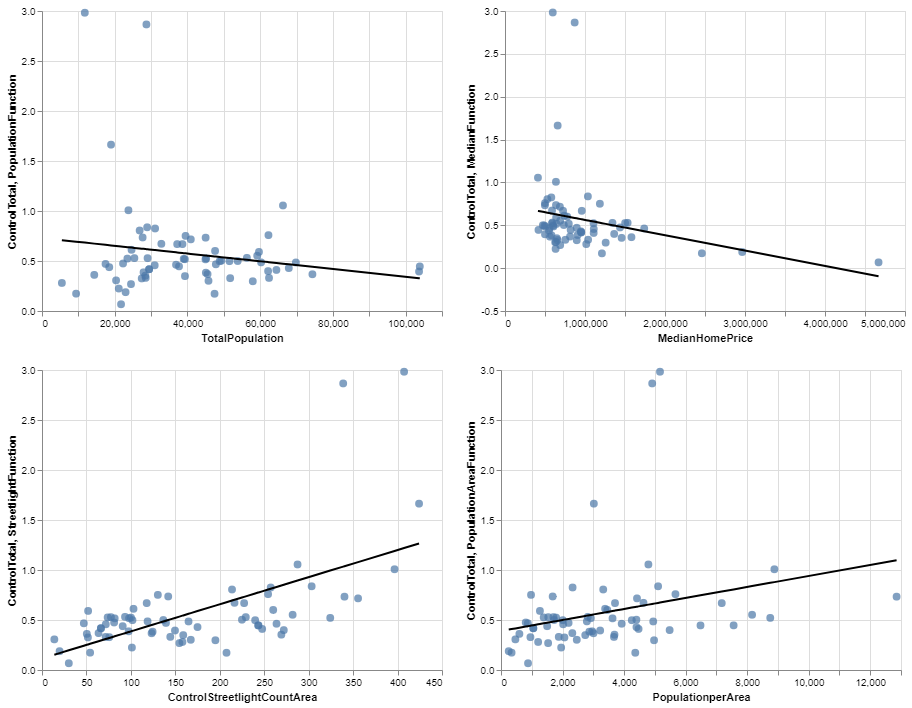

In [66]:
((Populationchart + populationline) | (MedianPricechart + medianline)) & (
    (Streetlightchart + streetline)|(PopulationAreachart + populationarealine))

In [67]:
outcome, predictors = patsy.dmatrices('ControlTotal ~ MedianHomePrice  + ControlStreetlightCountArea + TotalPopulation + PopulationperArea', analysisDF)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

In [68]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           ControlTotal   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     12.68
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           1.18e-07
Time:                        23:40:31   Log-Likelihood:                -25.427
No. Observations:                  69   AIC:                             60.85
Df Residuals:                      64   BIC:                             72.02
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Removing the outliers has only made it a more clear positive correlation. And looking at the graphs above we can start to see why.

We'll focus on the largest crime counts and analyze where they fall on each graph. In the Median price graph and the total population graph the largest crime is on the left with low population values and low housing costs. In the population per area graph they are in the middle. It seems that in LA specifically the highest rate of crime are in medium density housing areas where there is a need for a lot of streetligths so the streetlight graph ends up with a certain positive correlation. Based on the p-values of the regression test above we not only reject the null hypothesis that street lights have no effect we have to say that there is a positive correlation between the density of streetlights and the rate of crime. And while on the graph there is a negative correlation between Median house price and crime rate we have to throw that out since its p-value relative to the streetlight count is above a reasonable alpha value of 0.01.

# Ethics & Privacy

Our objective is not to identify and analyze crimes, but only to retrieve data of the location of the crimes. We are observing whether the rate of crimes are reduced in relation to the presence of streetlights, resulting in a lower amount of police patrol in the area. Because the data in question was released publicly, a majority of private information regarding the identity of the perpetrator of the crime was removed. The police stop data only includes the arrested’s age, sex, and descent as personal identifiers, none of which breach the standards set by the Safe Harbour Method of data anonymization. Although unique identifiers have been removed for privacy concerns, the data that remains in our analyses may possibly be affected by racial and socioeconomic biases in relation to the area of the crimes committed. It is important to consider the idea that the tendency of criminals in one area to be of a certain ethnicity in our data is intrinsically linked to socioeconomic factors of the location in question. 

# Conclusion & Discussion

We wanted to use the LA crime and arrest dataset in interesting ways. Our main focus was to analyze whether streetlights reduce the crime rates in LA city. To do this we also had to use geographical data within LA to confine and clean our crime and arrest datasets. What we found in the analysis was that there is actually a positive relationship between the density of streetlights in zip codes and the crime rate. There are many limitations to this question mainly due to the fact that we have relatively few data points and we're using zip code areas and populations based on zip codes. This is the main reason that our population density graph and streetlight count graph look so similar.

The takeaway is that streetlights cause crime and we should petition to turn them off.

In all seriousness there are more variables that need to be factored in before a reasonable conclusion can be made. So while our data does show a positive correlation we are leaving a lot out. The original datasets are vast. They can be applied to any number of different questions. The datasets can also be used to show any number of dubious correlations as we have shown above. In the end our main hypothesis and analysis aren't without their problems so any correlation that we found should be taken with much speculation and the LAPD should keep their normal way of doing things. As for future uses of the datasets they could be used to tie crimes to certain locations and times potentially giving the police a way to know what they're getting into. It can also be used to analyze statistics on the victims of crimes and those commiting crimes.